In [1]:
#!pip install --upgrade --no-cache-dir gdown

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
root_folder = '/content/drive/MyDrive/ADV_ML/OGLE3_clean_preprocessed'
output_folder = '/content/drive/MyDrive/ADV_ML/OGLE3_Spectrogram'

In [4]:
#!du -sh /content/drive/MyDrive/ADV_ML/OGLE3_clean_preprocessed


In [5]:
#!du -sh /content/drive/MyDrive/ADV_ML/OGLE3_Spectrogram

In [6]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchaudio.transforms as transforms
import random
import shutil
from tqdm import tqdm

In [7]:
seed = 42
np.random.seed(seed)
random.seed(seed)

##preprocessing

In [8]:
def extract_spectrograms(root_folder, output_folder):
    """
    Extract spectrograms for each CSV file in class folders within the root directory.

    Args:
    - root_folder (str): Path to the root directory containing class folders with CSV files.
    - output_folder (str): Path to the directory where spectrograms will be stored.
    """
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over each class folder in the root directory
    for class_folder in os.listdir(root_folder):
        class_folder_path = os.path.join(root_folder, class_folder)

        # Only process directories
        if os.path.isdir(class_folder_path):
            # Create a new directory for the class within the specified output folder
            class_output_folder = os.path.join(output_folder, class_folder)
            if not os.path.exists(class_output_folder):
                os.makedirs(class_output_folder)

            # Iterate over CSV files in the class folder
            for csv_file in tqdm(os.listdir(class_folder_path), desc=f"Processing {class_folder.split('_')[0]}"):
                if csv_file.endswith('.csv'):
                    csv_file_path = os.path.join(class_folder_path, csv_file)

                    # Load CSV file
                    df = pd.read_csv(csv_file_path)

                    # Concatenate time_diff and mag_diff columns into a single tensor
                    signal = torch.tensor(df[['mag_diff', 'time_diff']].values, dtype=torch.float32)
                    signal = signal.permute(1, 0)

                    # Extract spectrogram
                    spectrogram_transform = transforms.MelSpectrogram(n_mels=64)
                    spectrogram = spectrogram_transform(signal)

                    # Save spectrogram
                    spectrogram_file_name = os.path.splitext(csv_file)[0] + '_spectrogram.pt'
                    spectrogram_file_path = os.path.join(class_output_folder, spectrogram_file_name)
                    torch.save(spectrogram, spectrogram_file_path)

    print("\nSpectrogram extraction complete.")

In [9]:
root_folder = '/content/drive/MyDrive/ADV_ML/OGLE3_clean_preprocessed'
output_folder = '/content/drive/MyDrive/ADV_ML/OGLE3_Spectrogram'

In [10]:
extract_spectrograms(root_folder, output_folder)

Processing t2cep: 100%|██████████| 3618/3618 [28:57<00:00,  2.08it/s]


Spectrogram extraction complete.


In [21]:
def plot_random_spectrograms(output_folder):
    """
    Plot one randomly selected spectrogram from each class folder in the output folder in a plot with two columns.

    Args:
    - output_folder (str): Path to the directory containing spectrogram subfolders.
    """
    # Get list of all spectrogram subfolders (class folders)
    class_folders = [f for f in os.listdir(output_folder) if os.path.isdir(os.path.join(output_folder, f))]

    # Calculate number of rows and columns needed for subplots
    num_rows = (len(class_folders) + 1) // 2  # +1 to ensure at least 1 row if len(class_folders) is odd
    num_cols = 2

    # Create a plot with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8,24))

    # Plot one spectrogram from each class folder
    for i, class_folder in enumerate(class_folders):
        class_folder_path = os.path.join(output_folder, class_folder)
        spectrogram_files = os.listdir(class_folder_path)

        # Randomly select one spectrogram file
        random_spectrogram_file = random.choice(spectrogram_files)
        spectrogram_file_path = os.path.join(class_folder_path, random_spectrogram_file)
        spectrogram = torch.load(spectrogram_file_path)

        # Plot spectrogram in the appropriate subplot
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(spectrogram.log2()[0], aspect='auto', origin='lower')
        ax.set_title(f"Class: {class_folder}")
        ax.axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()




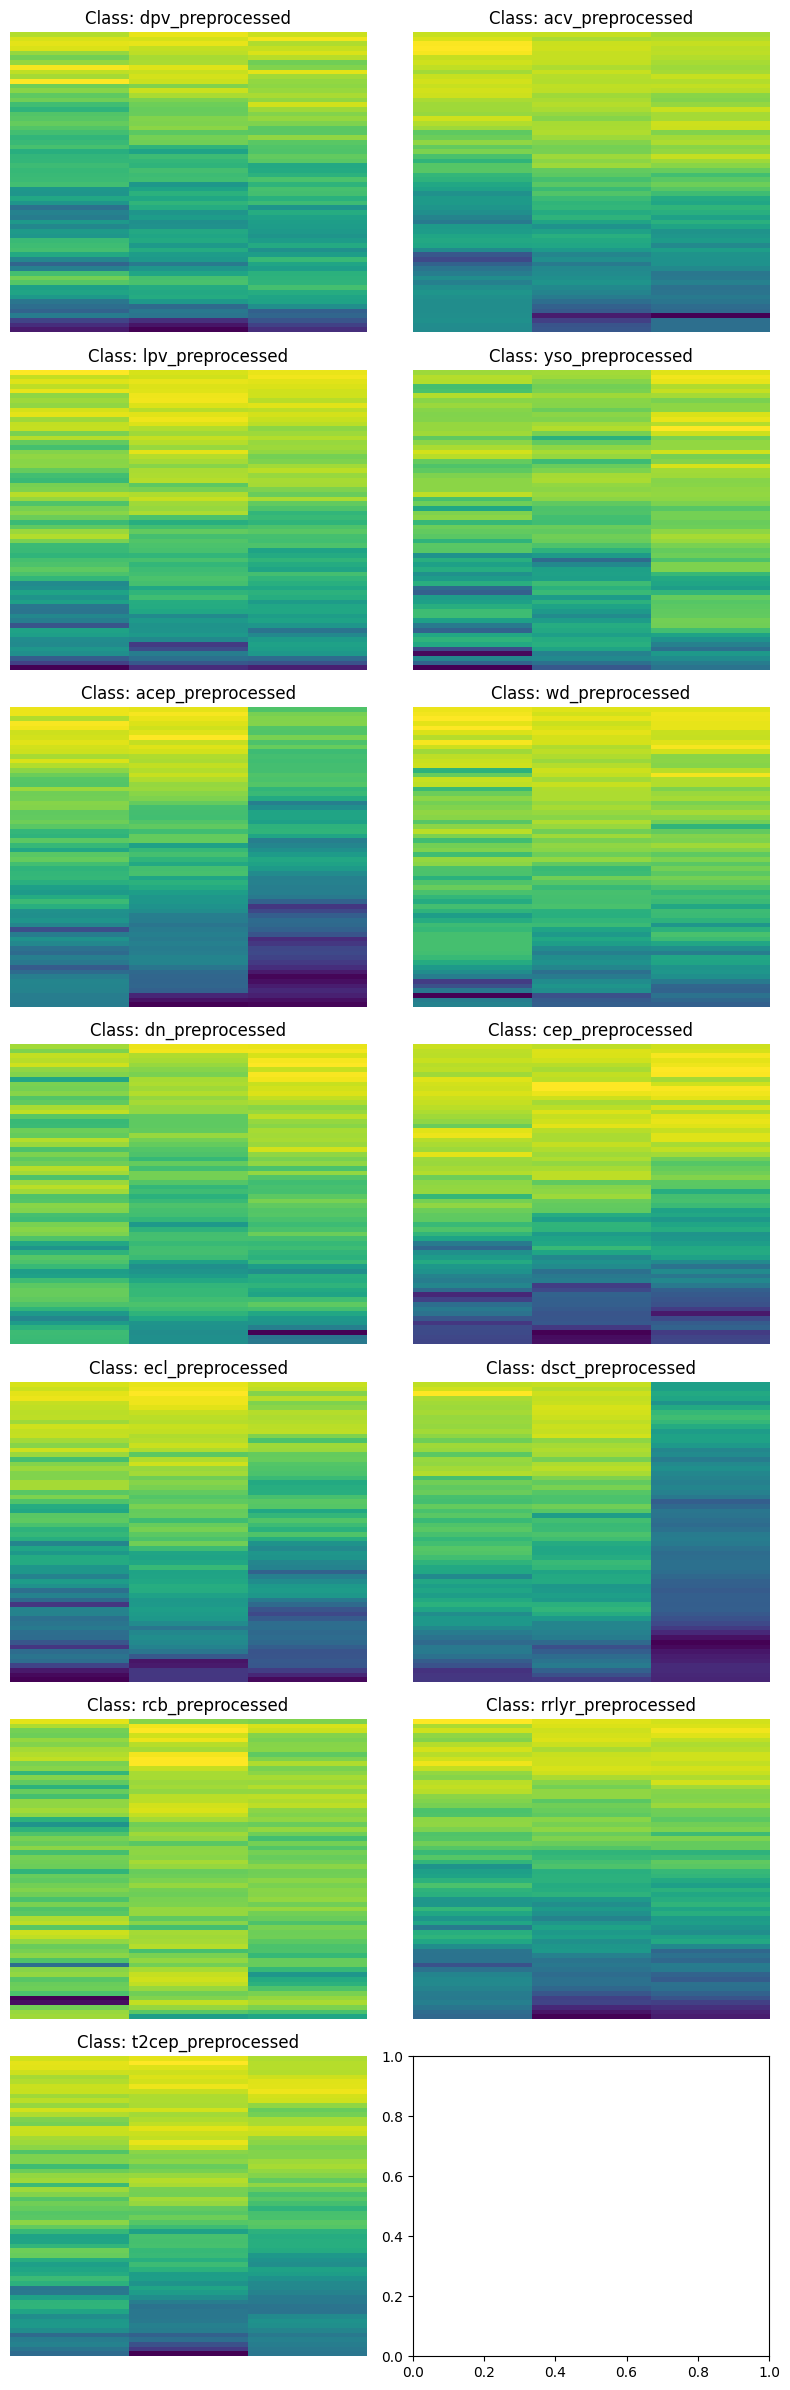

In [22]:
plot_random_spectrograms(output_folder)